In [16]:
import pandas as pd
import glob

In [17]:
files = glob.glob("*/UMI_collapse_junction_read.csv")
df = pd.concat([pd.read_csv(f) for f in files])

In [21]:
files

['N706_N502/UMI_collapse_junction_read.csv',
 'N707_N503/UMI_collapse_junction_read.csv',
 'N701_N501/UMI_collapse_junction_read.csv',
 'N714_N503/UMI_collapse_junction_read.csv',
 'N704_N508/UMI_collapse_junction_read.csv',
 'N707_N507/UMI_collapse_junction_read.csv',
 'N712_N506/UMI_collapse_junction_read.csv',
 'N711_N505/UMI_collapse_junction_read.csv',
 'N710_N504/UMI_collapse_junction_read.csv',
 'N711_N501/UMI_collapse_junction_read.csv',
 'N702_N502/UMI_collapse_junction_read.csv',
 'N710_N508/UMI_collapse_junction_read.csv',
 'N715_N504/UMI_collapse_junction_read.csv',
 'N714_N507/UMI_collapse_junction_read.csv',
 'N704_N504/UMI_collapse_junction_read.csv',
 'N705_N505/UMI_collapse_junction_read.csv',
 'N703_N507/UMI_collapse_junction_read.csv',
 'N703_N503/UMI_collapse_junction_read.csv',
 'N702_N506/UMI_collapse_junction_read.csv',
 'N706_N506/UMI_collapse_junction_read.csv',
 'N715_N508/UMI_collapse_junction_read.csv',
 'N705_N501/UMI_collapse_junction_read.csv',
 'N712_N50

In [7]:
df2=df.groupby('sample').sum()[['#collapsed_read_count']].sort_values('#collapsed_read_count',ascending=False)

KeyError: "None of [Index(['#collapsed_read_count'], dtype='object')] are in the [columns]"

In [24]:
tmp = sample.description.to_dict()
df['description'] = [tmp[x] for x in df['sample']]

In [26]:
df.to_csv("UMI_collapse_junction_read.merged.csv",index=False)

In [27]:
df

,amplicon,#collapsed_read_count,frequency,sample,description
0,1a_2b_chr11_5254896_-_chr1_119360189_+_cut1,11,0.000212,N706_N502,PER5_oML129_edit_d14
1,2b_1b_chr11_5254896_-_chr1_119360189_+_cut1,25,0.000481,N706_N502,PER5_oML129_edit_d14
2,1a_2a_chr11_5254896_-_chr1_119360189_+_cut1,40,0.000769,N706_N502,PER5_oML129_edit_d14
3,large_inversion_cut1,50,0.000961,N706_N502,PER5_oML129_edit_d14
4,2b_2b_cut1,60,0.001154,N706_N502,PER5_oML129_edit_d14
...,...,...,...,...,...
1,1a_1a_cut1,2,0.000124,N701_N505,PER2_oML129_control_d14
2,large_inversion_cut2,2,0.000124,N701_N505,PER2_oML129_control_d14
3,large_deletion_cut1,12,0.000743,N701_N505,PER2_oML129_control_d14
4,wt_cut1,7952,0.492689,N701_N505,PER2_oML129_control_d14


In [29]:
df[df['sample']=="N705_N501"]

,amplicon,#collapsed_read_count,frequency,sample,description
0,large_deletion_cut1,72,0.001265,N705_N501,PER5_oML129_control_d14
1,wt_cut1,25909,0.455327,N705_N501,PER5_oML129_control_d14
2,wt_cut2,30921,0.543408,N705_N501,PER5_oML129_control_d14


In [ ]:
N705_N501  wt_cut2                                        56567
           wt_cut1                                        56203
N701_N501  wt_cut2                                        51831
           wt_cut1                                        51589

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob

In [16]:
df

,amplicon,#collapsed_read_count,frequency,sample
0,1a_2b_chr11_5254896_-_chr1_119360189_+_cut1,11,0.000212,N706_N502
1,2b_1b_chr11_5254896_-_chr1_119360189_+_cut1,25,0.000481,N706_N502
2,1a_2a_chr11_5254896_-_chr1_119360189_+_cut1,40,0.000769,N706_N502
3,large_inversion_cut1,50,0.000961,N706_N502
4,2b_2b_cut1,60,0.001154,N706_N502
...,...,...,...,...
1,1a_1a_cut1,2,0.000124,N701_N505
2,large_inversion_cut2,2,0.000124,N701_N505
3,large_deletion_cut1,12,0.000743,N701_N505
4,wt_cut1,7952,0.492689,N701_N505


In [ ]:
# source = ("chr11", 5249956, 5249975, 200)
# destination = ("chr11", 5254880, 5254899, 1000)

In [22]:
sample = pd.read_csv("sample_info.csv")
sample.head()

,NGS_req-ID,name,Sample,description,Control sample (Y/N),Notes,Dilution,Cell name_type,I7_Index_ID,index_I1,...,sequence_guide_3,genome_guide_3,chr_guide_3,start_guide_3,end_guide_3,strand_guide_3,Donor (single strand; double strand),plamid_name,plasmid_sequence,genomic_background
0,VK2138,VK2138,VK2138,PER2_oML129_control_d5,Y,NaN,NaN,CD34,P7_N701_SBS12,N701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VK2139,VK2139,VK2139,PER2_oML129_edit_d5,N,NaN,NaN,CD34,P7_N702_SBS12,N702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VK2140,VK2140,VK2140,PER3_oML129_control_d5,Y,NaN,NaN,CD34,P7_N703_SBS12,N703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VK2141,VK2141,VK2141,PER3_oML129_edit_d5,N,NaN,NaN,CD34,P7_N704_SBS12,N704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VK2142,VK2142,VK2142,PER5_oML129_control_d5,Y,NaN,NaN,CD34,P7_N705_SBS12,N705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
sample.index = sample['index_I1']+"_"+sample['index_I2']

In [12]:
sample.head()

,NGS_req-ID,name,Sample,description,Control sample (Y/N),Notes,Dilution,Cell name_type,I7_Index_ID,index_I1,...,sequence_guide_3,genome_guide_3,chr_guide_3,start_guide_3,end_guide_3,strand_guide_3,Donor (single strand; double strand),plamid_name,plasmid_sequence,genomic_background
N701_N501,VK2138,VK2138,VK2138,PER2_oML129_control_d5,Y,NaN,NaN,CD34,P7_N701_SBS12,N701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N702_N502,VK2139,VK2139,VK2139,PER2_oML129_edit_d5,N,NaN,NaN,CD34,P7_N702_SBS12,N702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N703_N503,VK2140,VK2140,VK2140,PER3_oML129_control_d5,Y,NaN,NaN,CD34,P7_N703_SBS12,N703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N704_N504,VK2141,VK2141,VK2141,PER3_oML129_edit_d5,N,NaN,NaN,CD34,P7_N704_SBS12,N704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N705_N505,VK2142,VK2142,VK2142,PER5_oML129_control_d5,Y,NaN,NaN,CD34,P7_N705_SBS12,N705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
tmp = sample.description.to_dict()
df7.index = [tmp[x] for x in df7.index]

<AxesSubplot:xlabel='amplicon', ylabel='sample'>

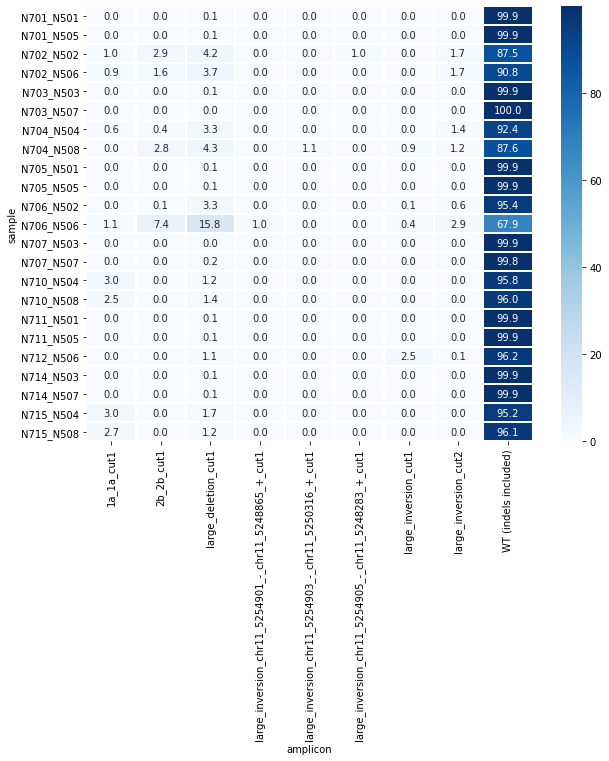

In [17]:
df5 = df.pivot(index="sample",columns = ['amplicon'],values="frequency").fillna(0)
df5['WT (indels included)'] = df5[['wt_cut1','wt_cut2']].sum(axis=1)
df6 = df5.drop(['wt_cut1','wt_cut2'],axis=1)
df7=df6[df6.columns[df6.max()>=0.01]]*100
plt.figure(figsize=(10,8))
sns.heatmap(df7,annot=True,cmap="Blues",linewidth=0.1,fmt=".1f")
# plt.savefig("BCL11A_g34_UDITAS_amplicon_heatmap.pdf",bbox_inches='tight')


<AxesSubplot:xlabel='amplicon'>

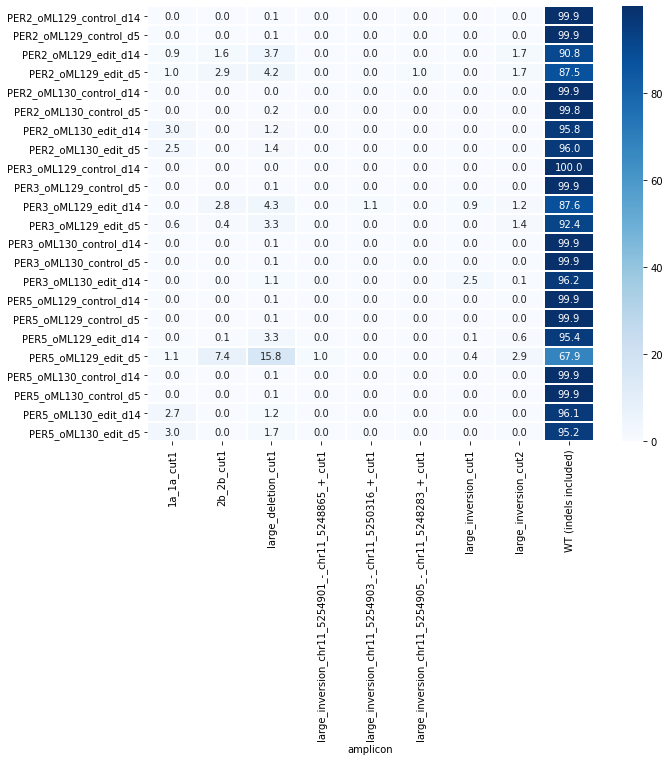

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df7.sort_index(),annot=True,cmap="Blues",linewidth=0.1,fmt=".1f")

In [21]:
df7.columns = ['BCL11A_BCL11A','BCL11A_HBG','BCL11A_HBG','BCL11A_BCL11A','BCL11A_HBG','BCL11A_HBG','BCL11A_chr17_81869598','BCL11A_HBG','BCL11A_HBG','g34_large_deletion','WT (indels included)']

In [24]:
df8=df7[['WT (indels included)','g34_large_deletion','BCL11A_chr17_81869598']]
df8['BCL11A_BCL11A'] = df7['BCL11A_BCL11A'].sum(axis=1)
df8['BCL11A_HBG'] = df7['BCL11A_HBG'].sum(axis=1)


<ipython-input-24-7b03fd0c76b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['BCL11A_BCL11A'] = df7['BCL11A_BCL11A'].sum(axis=1)
<ipython-input-24-7b03fd0c76b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['BCL11A_HBG'] = df7['BCL11A_HBG'].sum(axis=1)


In [23]:
df7['BCL11A_BCL11A']

,BCL11A_BCL11A,BCL11A_BCL11A
sample,,
N701_N501,0.000000,0.000000
N702_N502,1.377076,0.661536
N703_N503,1.340506,0.987741
N704_N504,0.032005,0.040006
N705_N505,1.026090,7.758243
N706_N506,2.182364,9.418625
N707_N507,0.000000,0.000000
N710_N508,0.000000,0.006056
N711_N501,0.000000,0.000000


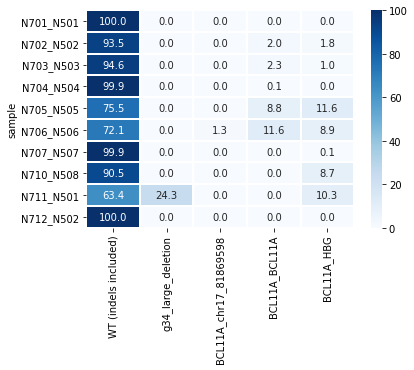

In [26]:
# plt.figure(figsize=(10,8))
sns.heatmap(df8,annot=True,cmap="Blues",linewidth=0.1,fmt=".1f")
plt.savefig("BCL11A_g34_UDITAS_amplicon_heatmap.pdf",bbox_inches='tight')


# circos plot

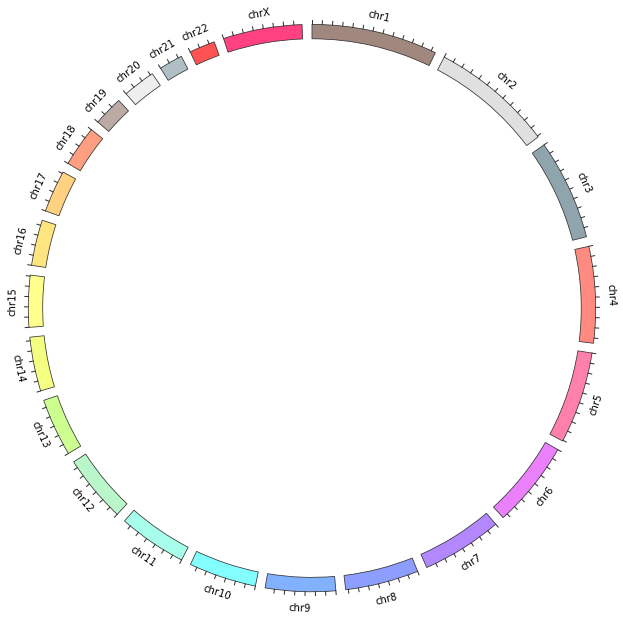

In [42]:
import pycircos
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle
circle = Gcircle(figsize=(8,8)) 
with open("/home/yli11/Data/Human/hg38/annotations/hg38.circos.size") as f:
    for line in f:
        line   = line.rstrip().split("\t") 
        name   = line[0]
        if len(name)<=1:
            continue
        if name =="chrM":
            continue
        length = int(line[-1]) 
        # print (name,length)
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)
        circle.add_garc(arc) 
circle.set_garcs(0,360) 
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=None) 
# circle.figure


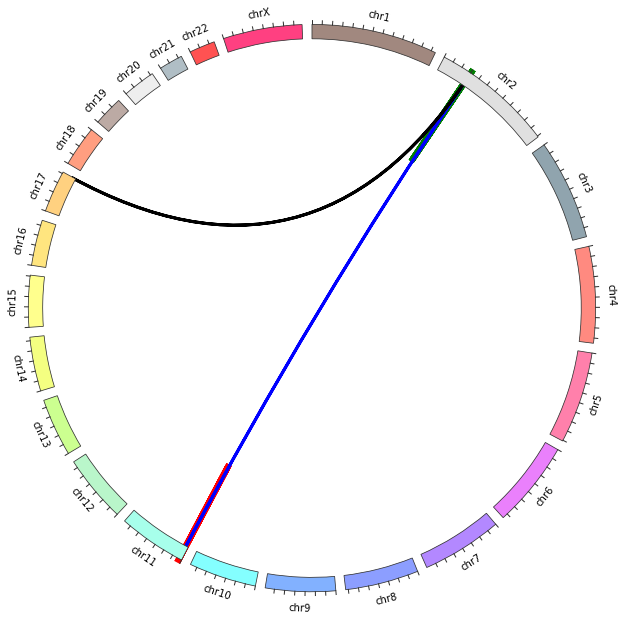

In [43]:
#linkplot
#heatmap
# HBG large deletion
source = ("chr11", 5249956, 5249975, 1000)
destination = ("chr11", 5254880, 5254899, 1000)
circle.chord_plot(source, destination,linewidth=6, edgecolor="red")
# BCL11A BCL11A
source = ("chr2", 60495264, 60495264, 1000)
destination = ("chr2", 60495283, 60495283, 1000)
circle.chord_plot(source, destination,linewidth=6, edgecolor="green")
# BCL11A HBG
source = ("chr2", 60495264, 60495283, 950)
destination = ("chr11", 5254880, 5254899, 950)
circle.chord_plot(source, destination,linewidth=3, edgecolor="blue")

# BCL11A chr17
source = ("chr2", 60495264, 60495283, 950)
destination = ("chr17", 81869598, 81869598, 950)
circle.chord_plot(source, destination,linewidth=3, edgecolor="black")
circle.figure

In [44]:
circle.figure.savefig("BCL11A_HBG_UDITAS_translocation.pdf",bbox_inches="tight")